In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from src.main import get_pages, calc_document_layout
from src import sweep

xpdf_folder_path = Path('../tests/output/pdf2')

# TODO: review pmid19158391 for Syntax Warning: Bad annotation destination

In [2]:
pages = get_pages(Path(xpdf_folder_path))

In [3]:
layout = calc_document_layout(pages)

In [4]:
layout

Layout(width=612, height=792, num_cols=2, row_width=215, row_height=10, content_region=Bbox(x=72, y=33, width=479, height=737, x1=551, y1=770), col_coords=[72, 304])

In [5]:
from src.draw import draw_content_region, draw_text_regions, draw_columns, draw_bboxes
from src.contours import get_potential_contours
from PIL import Image

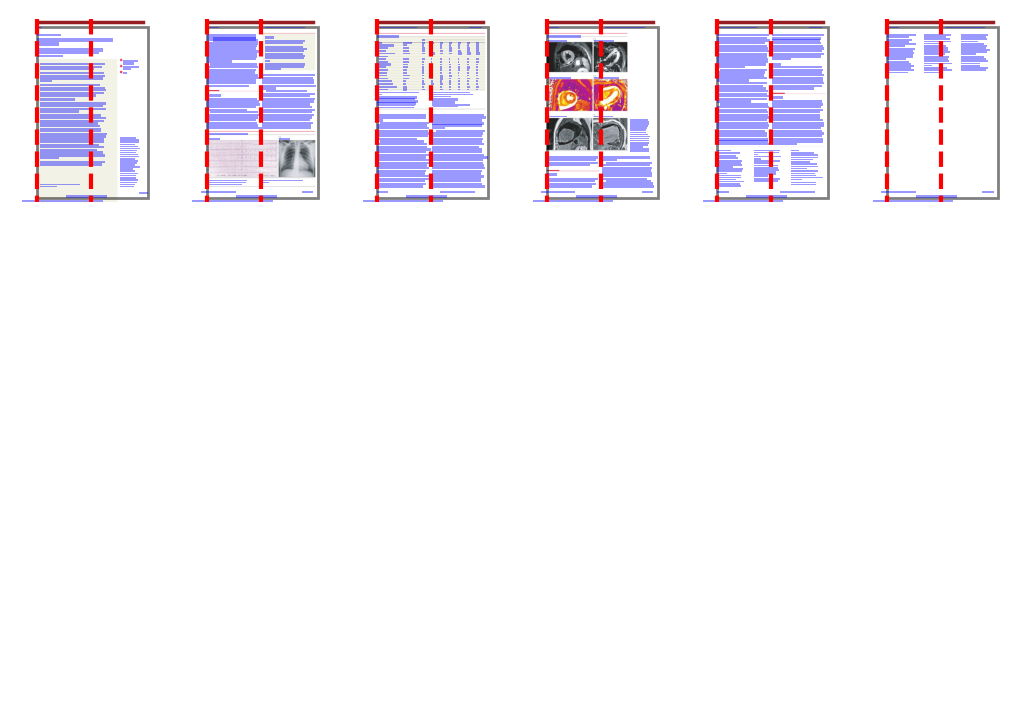

In [6]:
number_cols = 6
number_rows = int(len(pages) / number_cols) + 1
_, ax = plt.subplots(number_rows, number_cols, dpi=200)

for idx, page in enumerate(pages):
  col = idx % number_cols
  row = int(idx / number_cols) 

  page_name = page.img_name
  png_path = (Path(xpdf_folder_path) / page_name).resolve()
  page_image = Image.open(png_path)
  page_image = page_image.resize((page.width, page.height)) 

  draw_content_region(ax[row][col], layout.content_region)
  draw_text_regions(ax[row][col], page)
  draw_columns(ax[row][col], layout)
  ax[row][col].imshow(page_image)
  ax[row][col].axis('off')

for idx in range(len(pages), number_rows*number_cols):
  col = idx % number_cols
  row = int(idx / number_cols) 
  ax[row][col].axis('off')

## 2. Region Detection
Use the captions for figures and tables to find potential areas in the page that
can hold a figure.

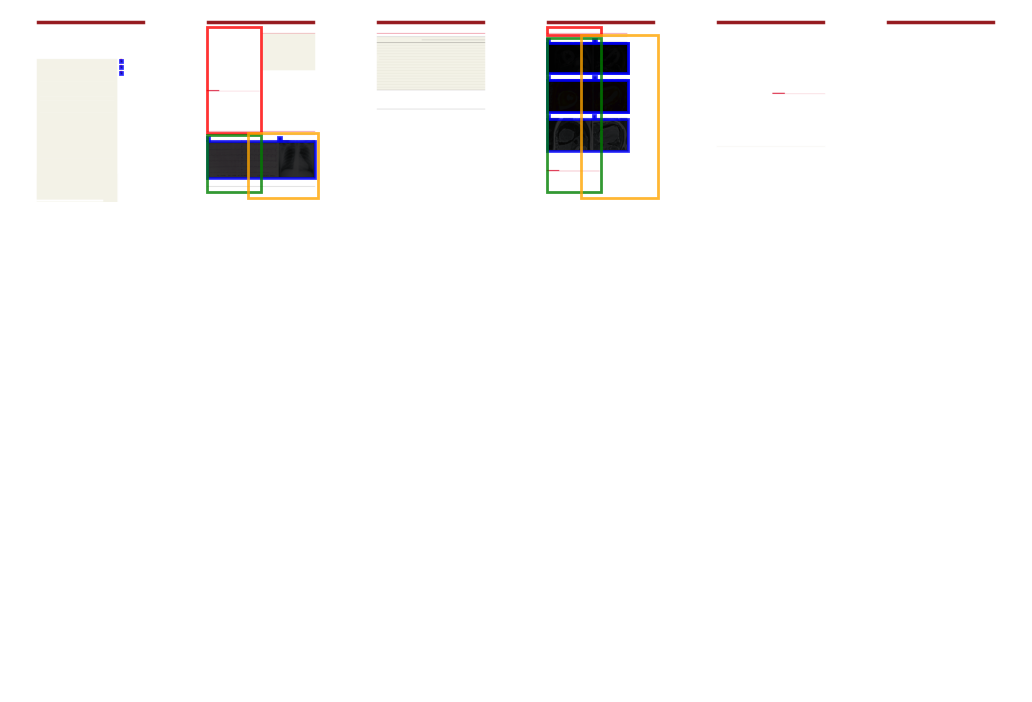

In [14]:
number_cols = 6
number_rows = int(len(pages) / number_cols) + 1
_, ax = plt.subplots(number_rows, number_cols, dpi=200)

for idx, page in enumerate(pages):
  col = idx % number_cols
  row = int(idx / number_cols) 
  page_name = page.img_name
  png_path = (Path(xpdf_folder_path) / page_name).resolve()
  page_image = Image.open(png_path)
  page_image = page_image.resize((page.width, page.height))

  fig_captions, table_captions = page.find_caption_boxes()
  regions_top = sweep.estimate_caption_regions_top(fig_captions, layout)
  regions_bottom = sweep.estimate_caption_regions_bottom(fig_captions, layout)
  regions_side = sweep.estimate_caption_regions_side(fig_captions, layout)

  candidates, cnts = get_potential_contours(xpdf_folder_path, page, layout, fig_captions)
  draw_bboxes(ax[row][col], candidates, edgecolor='blue', facecolor='black', alpha=0.8)

  top_bboxes = [el.bbox for el in regions_top]
  bottom_boxes = [el.bbox for el in regions_bottom]
  side_boxes = [el.bbox for el in regions_side]

  draw_bboxes(ax[row][col], top_bboxes, edgecolor='red', facecolor='none', alpha=0.8)
  draw_bboxes(ax[row][col], bottom_boxes, edgecolor='green', facecolor='none', alpha=0.8)
  draw_bboxes(ax[row][col], side_boxes, edgecolor='orange', facecolor='none', alpha=0.8)
  # draw_columns(ax[row][col], layout)
  ax[row][col].imshow(page_image)
  ax[row][col].axis('off')

for idx in range(len(pages), number_rows*number_cols):
  col = idx % number_cols
  row = int(idx / number_cols) 
  ax[row][col].axis('off')

In [17]:
def filter_images_by_area(page, threshold=1000):
  page.figures = [f for f in page.figures if f.bbox.width * f.bbox.height > threshold]

for page in pages:
  fig_captions, table_captions = page.find_caption_boxes()
  candidates, _ = get_potential_contours(xpdf_folder_path, page, layout, fig_captions)
  sweep.sweep_regions(page, candidates, fig_captions, table_captions, layout)
sweep.match_orphans(pages, layout)

for page in pages:
  filter_images_by_area(page)


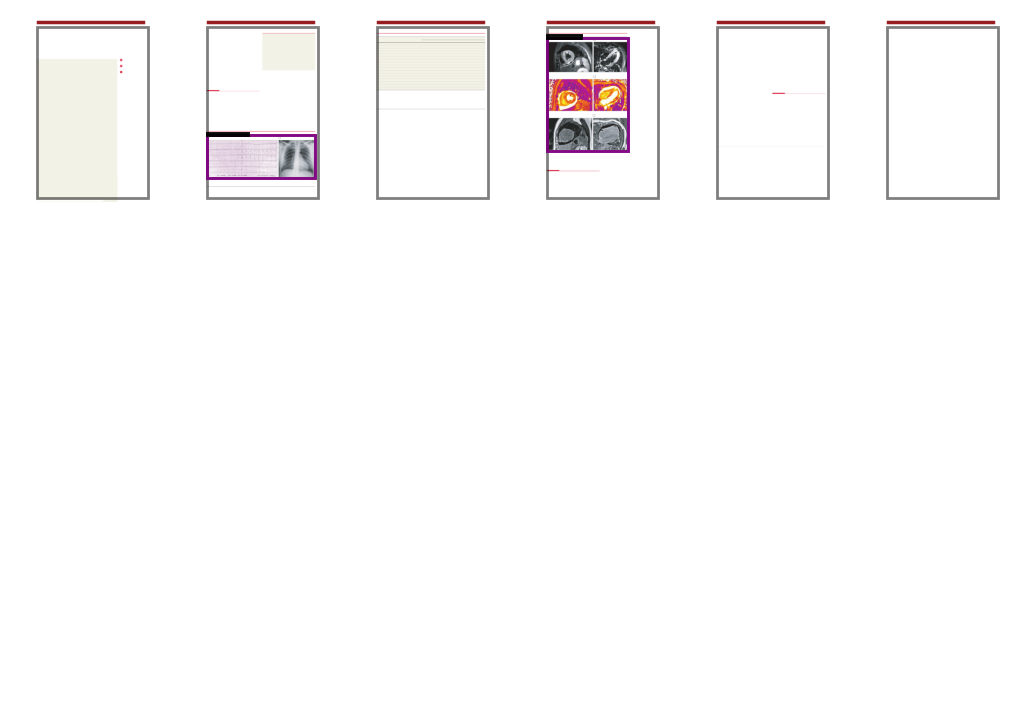

In [18]:
number_cols = 6
number_rows = int(len(pages) / number_cols) + 1
_, ax = plt.subplots(number_rows, number_cols, dpi=200)

for idx, page in enumerate(pages):
  col = idx % number_cols
  row = int(idx / number_cols) 

  page_name = page.img_name
  png_path = (Path(xpdf_folder_path) / page_name).resolve()
  page_image = Image.open(png_path)
  page_image = page_image.resize((page.width, page.height)) 

  draw_content_region(ax[row][col], layout.content_region)

  figures = [x.bbox for x in page.figures]
  captions = [x.caption for x in page.figures if x.caption is not None]
  draw_bboxes(ax[row][col], figures, 'purple', 'none', 0.8)
  draw_bboxes(ax[row][col], captions, 'black', 'none', 0.8)

  ax[row][col].imshow(page_image)
  ax[row][col].axis('off')

for idx in range(len(pages), number_rows*number_cols):
  col = idx % number_cols
  row = int(idx / number_cols) 
  ax[row][col].axis('off')

In [16]:
pages[0].figures

[Figure(bbox=Bbox(x=430, y=175, width=11, height=63, x1=441, y1=238), multicolumn=True, caption=None, sweep_type='orphan', identifier='', type='temp')]

In [12]:
36*20

720

In [1]:
import matplotlib.pyplot as plt
import src.draw as draw
from pathlib import Path
from main import extract
from PIL import Image

In [2]:
from main import get_pages

pdf_path = '/home/jtt/pdfs/sample_wormbase/pmid21854766.pdf'
base_folder = '../tests/output/'
# pages, layout, xpdf_folder_path = extract(pdf_path, base_folder)
xpdf_folder_path = Path(base_folder)/'pmid21854766'/'xpdf_pmid21854766'

pages = get_pages(xpdf_folder_path.resolve())

In [7]:
from main import calc_row_size, find_content_region
row_width, row_height = calc_row_size(pages)
content_region = find_content_region(pages, pages[0].width)

TypeError: 'NoneType' object is not iterable

In [4]:
content_region

Bbox(x=59, y=7, width=493, height=746, x1=552, y1=753)

In [5]:
from main import calc_document_layout
layout = calc_document_layout(pages)
layout

Layout(width=612, height=792, num_cols=2, row_width=195, row_height=7, content_region=Bbox(x=59, y=7, width=493, height=746, x1=552, y1=753), col_coords=[59, 313])

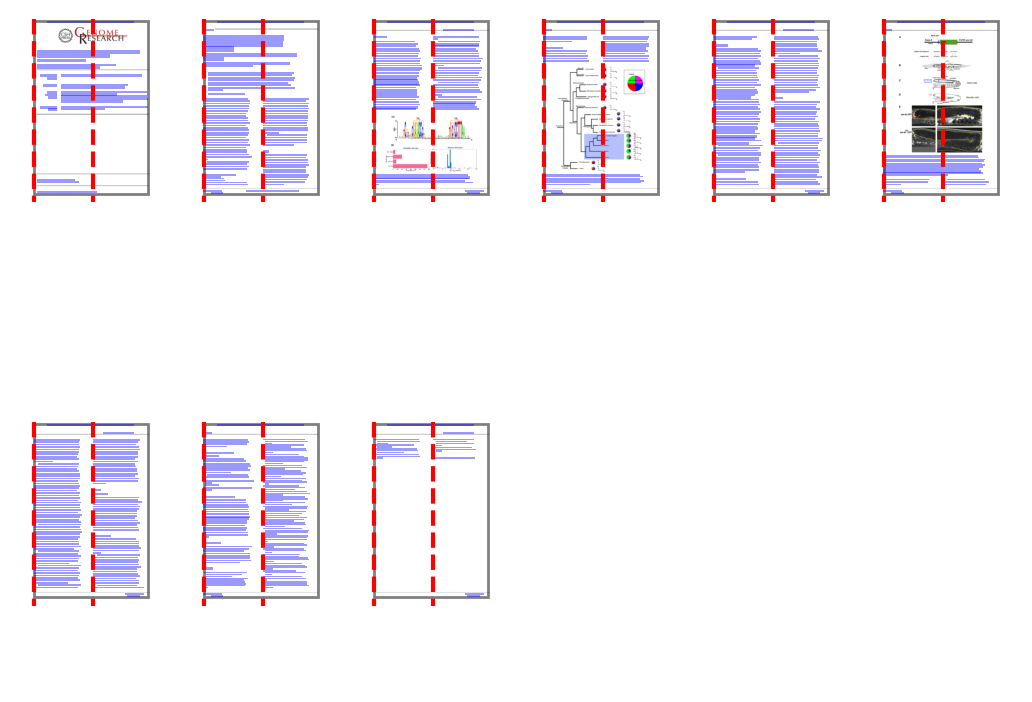

In [16]:
from draw import draw_content_region, draw_text_regions, draw_columns

number_cols = 6
number_rows = int(len(pages) / number_cols) + 1
_, ax = plt.subplots(number_rows, number_cols, dpi=200)

for idx, page in enumerate(pages):
  col = idx % number_cols
  row = int(idx / number_cols) 

  page_name = page.img_name
  png_path = (Path(xpdf_folder_path) / page_name).resolve()
  page_image = Image.open(png_path)
  page_image = page_image.resize((page.width, page.height)) 

  draw_content_region(ax[row][col], layout.content_region)
  draw_text_regions(ax[row][col], page)
  draw_columns(ax[row][col], layout)
  ax[row][col].imshow(page_image)
  ax[row][col].axis('off')

for idx in range(len(pages), number_rows*number_cols):
  col = idx % number_cols
  row = int(idx / number_cols) 
  ax[row][col].axis('off')

In [14]:
import math
page_width = pages[0].width  # TODO: change to mode width?
number_cols = math.floor(page_width / row_width)
number_cols

3

In [6]:
from main import save

save(pdf_path, pages, base_folder, layout)

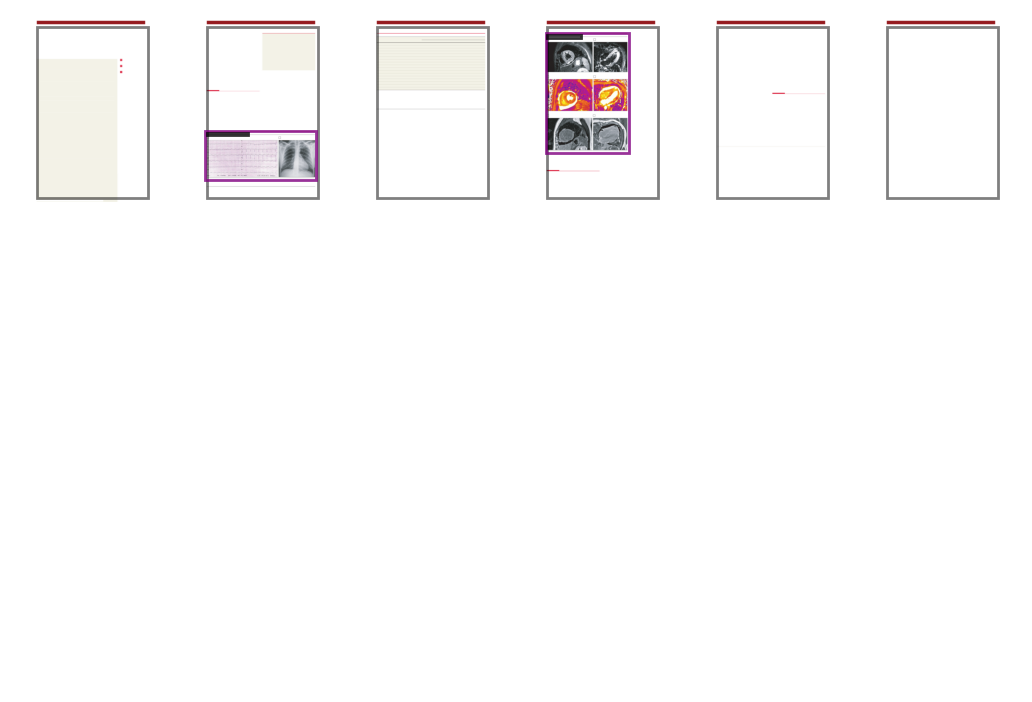

In [7]:
number_cols = 6
number_rows = int(len(pages) / number_cols) + 1
_, ax = plt.subplots(number_rows, number_cols, dpi=200)

for idx, page in enumerate(pages):
  col = idx % number_cols
  row = int(idx / number_cols) 

  page_name = page.img_name
  png_path = (Path(xpdf_folder_path) / page_name).resolve()
  page_image = Image.open(png_path)
  page_image = page_image.resize((page.width, page.height)) 

  draw.draw_content_region(ax[row][col], layout.content_region)

  figures = [x.bbox for x in page.figures]
  captions = [x.caption for x in page.figures if x.caption is not None]
  draw.draw_bboxes(ax[row][col], figures, 'purple', 'none', 0.8)
  draw.draw_bboxes(ax[row][col], captions, 'black', 'none', 0.8)

  ax[row][col].imshow(page_image)
  ax[row][col].axis('off')

for idx in range(len(pages), number_rows*number_cols):
  col = idx % number_cols
  row = int(idx / number_cols) 
  ax[row][col].axis('off')

In [6]:
pages[8].figures

[Figure(bbox=Bbox(x=54, y=64, width=226, height=284, x1=280, y1=348), multicolumn=False, caption=TextBox(x=42, y=349, width=244, height=90, x1=271, y1=359, page_number=9, text='Figure 6. Cyanate inhibits insulin secretion in islets ex vivo. (A) Insulin secretion shown as the percentage of insulin content as assessed in 1-hour static incubations and (B) total islet insulin levels in the presence of 0, 0.2, or 1 mmol/l (mM) cyanate (n = 6). (C) Insulin secretion shown as the percentage of insulin content as assessed in 1-hour static incubations in the presence of 1 mmol/l cyanate with or without DON (20 μmol/l) or NAC (500 μmol/l) (n = 5–6). Data represent the mean ± SEM. *P < 0.05 and **P < 0.01 versus control for the same incubation condition; 1-way ANOVA with Bonferroni’s post-hoc test.'), sweep_type='captions_below_figures', identifier='Figure 6', type='temp')]

In [5]:
pages[3].figures[0].bbox.y - layout.content_region.y

34

In [6]:
layout.row_height

11